In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb


In [ ]:
df = pd.read_csv('/content/car data.csv')
print("Shape:", df.shape)
print(df.head())
print(df.info())


Shape: (301, 9)
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   

In [ ]:
# Extract Brand as a proxy for "brand goodwill"
df['Brand'] = df['Car_Name'].str.split().str[0].str.lower()
df.drop(['Car_Name'], axis=1, inplace=True)

# Create Car Age
df['Car_Age'] = 2025 - df['Year']
df.drop(['Year'], axis=1, inplace=True)

# Encode Categorical Variables
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission', 'Brand'], drop_first=True)

df.head()


,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual,Brand_activa,...,Brand_suzuki,Brand_swift,Brand_sx4,Brand_tvs,Brand_um,Brand_verna,Brand_vitara,Brand_wagon,Brand_xcent,Brand_yamaha
0,3.35,5.59,27000,0,11,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,4.75,9.54,43000,0,12,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2,7.25,9.85,6900,0,8,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2.85,4.15,5200,0,14,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,4.60,6.87,42450,0,11,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    }


In [ ]:
results_df = pd.DataFrame(results).T
print(results_df.sort_values("R²", ascending=False))


                        MAE       MSE      RMSE        R²
Random Forest      0.616262  0.794541  0.891370  0.965508
XGBoost            0.620608  1.074685  1.036670  0.953347
Decision Tree      0.793934  1.885362  1.373085  0.918154
Ridge Regression   1.071717  2.697808  1.642501  0.882885
Linear Regression  1.221051  3.459392  1.859944  0.849824


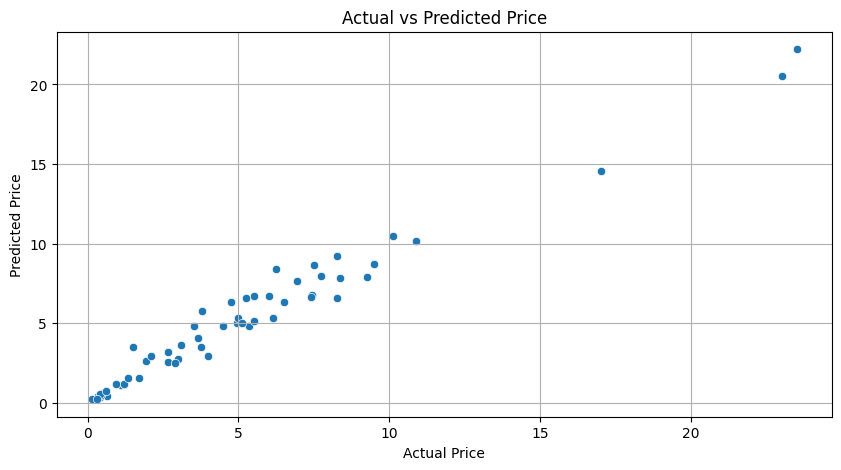

In [ ]:
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.show()


<ipython-input-13-f5baf5c618d3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.index, y=feat_imp.values, palette='mako')


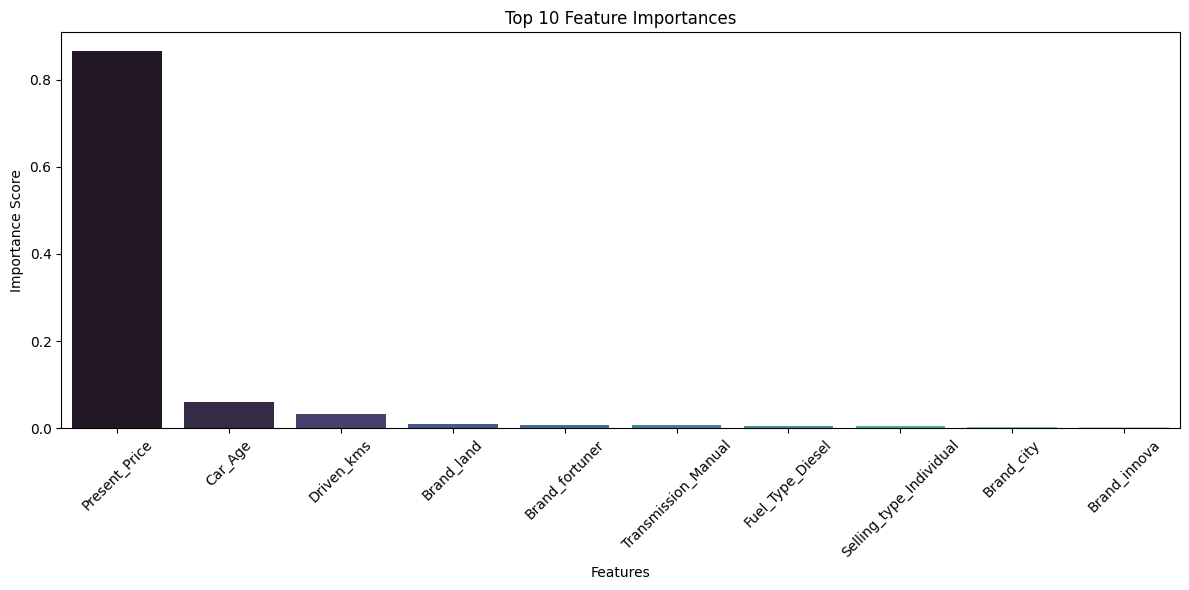

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature importance as DataFrame
feat_imp = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=feat_imp.index, y=feat_imp.values, palette='mako')

plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

